In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/seoihwan/Desktop/escuela/문화관광빅데이터/pow-gongmo/data/final/final_animal_visit_travel_검색건수.csv',encoding='cp949')

In [3]:
df

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12,기타관광_검색건수,문화관광_검색건수,숙박_검색건수,역사관광_검색건수,음식_검색건수,자연관광_검색건수,체험관광_검색건수
0,가평군,22105529,13,11,223,35,37,4.17,3.95,3.99,157771,234906,1311127,17744,1226985,361855,1289
1,강남구,103309405,2,11,3,10,36,4.10,4.13,3.98,274883,1649245,1664707,127637,5789966,0,464
2,강동구,23706460,2,6,1,2,18,3.60,3.92,3.96,2841,191445,76353,28654,829629,0,559
3,강릉시,26260986,8,11,70,33,33,4.27,4.13,3.75,147345,600572,1401723,196020,2912455,1026485,46494
4,강북구,18328235,1,5,1,6,19,4.50,4.00,3.89,14735,88315,115210,124365,415549,5433,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,홍천군,15071693,5,5,69,6,8,4.26,4.15,4.08,138961,746692,2443167,31919,1038686,117147,9814
225,화성시,51736786,13,25,24,9,66,4.19,4.02,3.98,290981,760251,656112,198256,3876151,711044,139176
226,화순군,7963778,4,4,4,2,8,4.41,4.16,3.97,20464,58215,50249,44275,218796,35596,9258
227,화천군,2428709,3,2,11,0,0,4.00,4.23,4.11,19009,52687,48962,1953,25393,11864,633


## 반려동물 동반 가능 장소 TOP10's 시군구

In [39]:
from collections import Counter
lst = []

[lst.append(i) for i in df.sort_values('관광명소',ascending=False)['시군구'].head(10).values]
[lst.append(i) for i in df.sort_values('기타',ascending=False)['시군구'].head(10).values]
[lst.append(i) for i in df.sort_values('음식점',ascending=False)['시군구'].head(10).values]
[lst.append(i) for i in df.sort_values('숙박',ascending=False)['시군구'].head(10).values]
[lst.append(i) for i in df.sort_values('카페',ascending=False)['시군구'].head(10).values]
cc = Counter(lst).most_common(10)

<AxesSubplot: title={'center': '반려동물 동반 가능 장소 TOP 10'}>

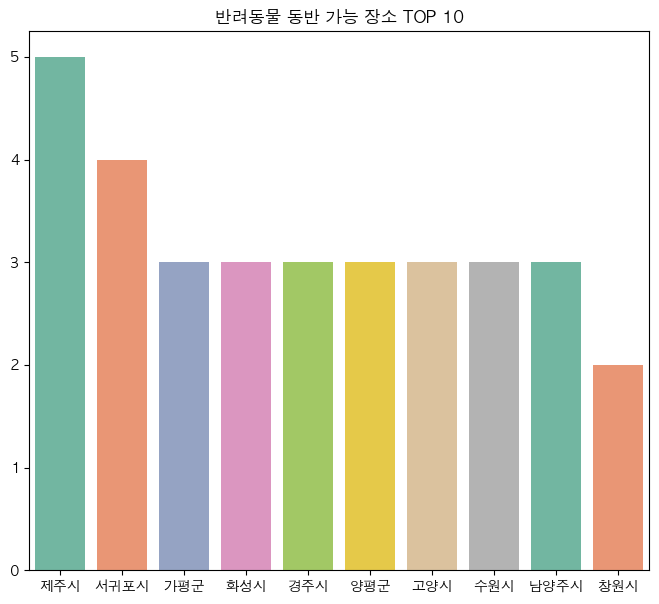

In [46]:
cc_si = [a[0] for a in cc]
cc_va = [a[1] for a in cc]

plt.figure(figsize=(8,7))
plt.title('반려동물 동반 가능 장소 TOP 10')
plt.rc('font', family='AppleGothic')
palette = sns.color_palette('Set2')
sns.barplot(x=cc_si,y=cc_va,palette=palette)

In [26]:
df1 = df.drop(columns=['관광명소','기타','음식점','숙박','카페'],axis=1)

## 관광하기 좋은 장소 TOP10's 시군구

In [37]:
lst = []

for t in df1.columns:
    [lst.append(i) for i in df.sort_values(t,ascending=False)['시군구'].head(10).values]
cc = Counter(lst).most_common(10)

<AxesSubplot: title={'center': '관광하기 좋은 장소 TOP 10'}>

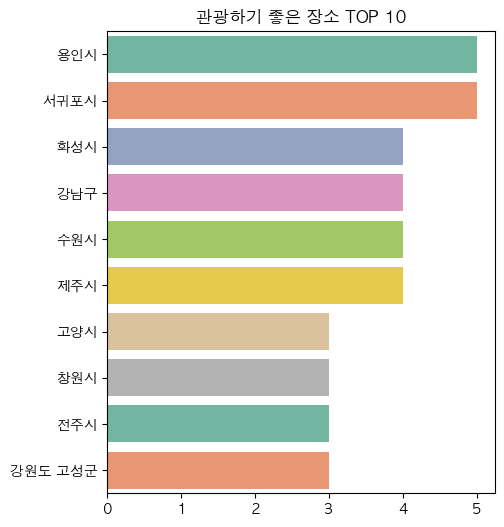

In [38]:
cc_si = [a[0] for a in cc]
cc_va = [a[1] for a in cc]

plt.figure(figsize=(5,6))
plt.rc('font', family='AppleGothic')
palette = sns.color_palette('Set2')
plt.title('관광하기 좋은 장소 TOP 10')
sns.barplot(y=cc_si,x=cc_va,palette=palette)

In [4]:
df_dropsi = df.drop(columns='시군구')

## 각 열 히트맵 확인

<AxesSubplot: >

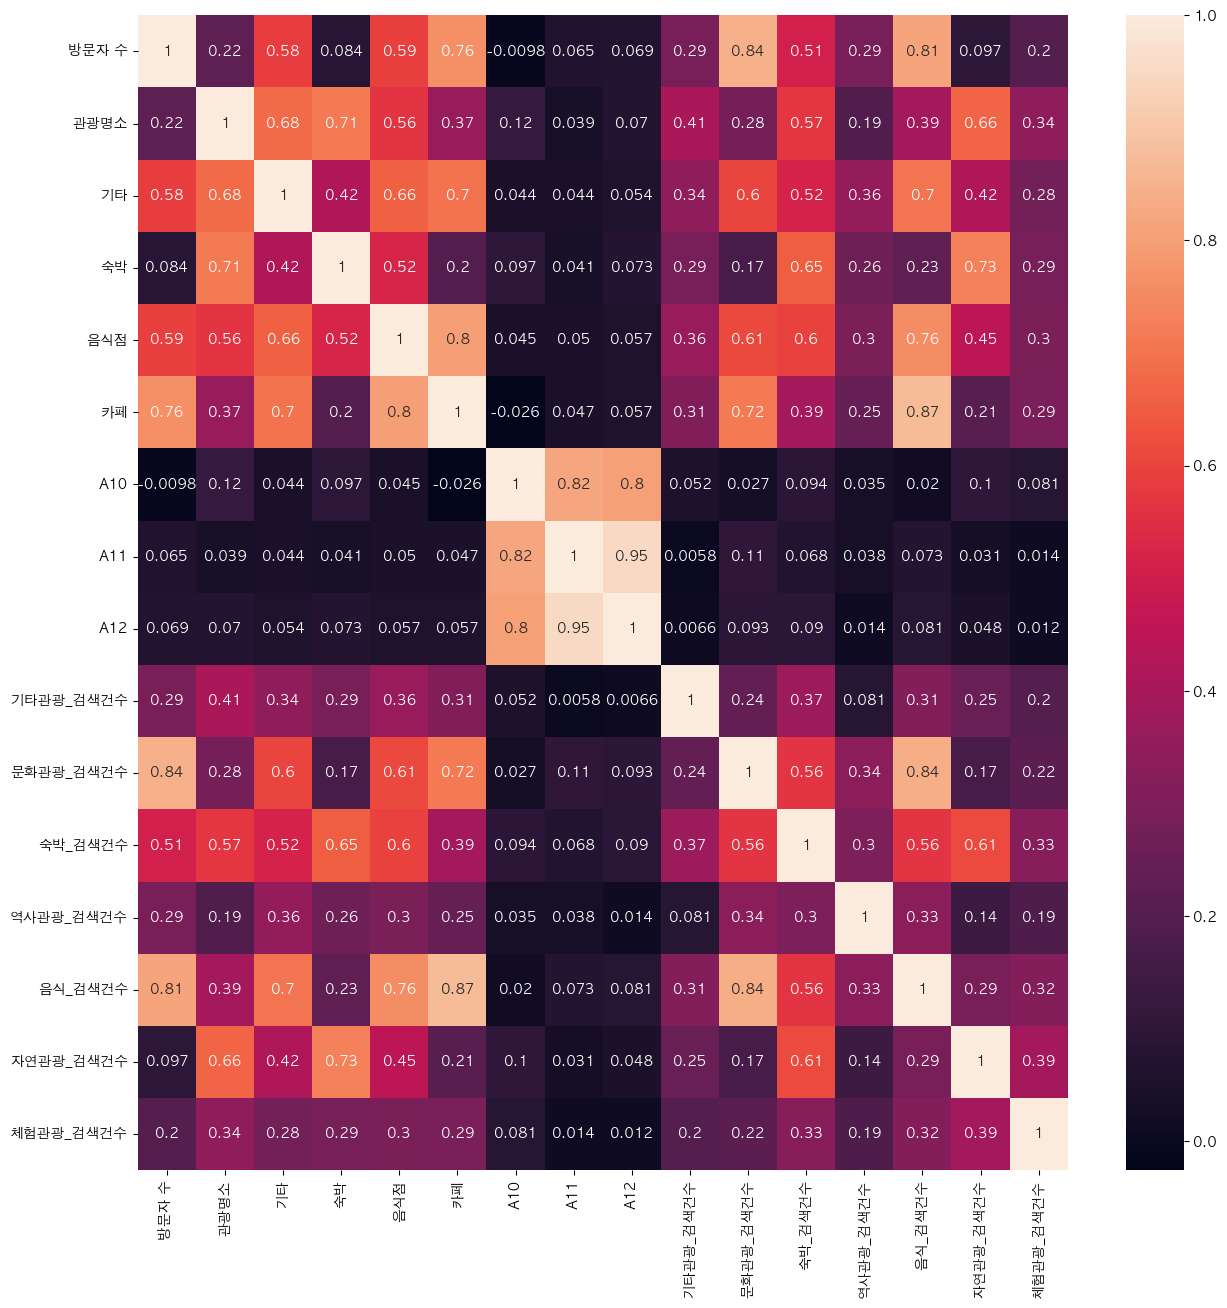

In [9]:
plt.rc('font', family='AppleGothic')
plt.figure(figsize=(15,15))
sns.heatmap(df_dropsi.corr(),annot=True,)

In [8]:
# 자연관광 검색건수 0인 시군구 확인 후, 엑셀로 처리
df[df['자연관광_검색건수']==0]

,시군구,방문자 수,관광명소,기타,숙박,음식점,카페,A10,A11,A12,기타관광_검색건수,문화관광_검색건수,숙박_검색건수,역사관광_검색건수,음식_검색건수,자연관광_검색건수,체험관광_검색건수
1,강남구,103309405,2,11,3,10,36,4.10,4.13,3.98,274883,1649245,1664707,127637,5789966,0,464
2,강동구,23706460,2,6,1,2,18,3.60,3.92,3.96,2841,191445,76353,28654,829629,0,559
5,강서구,44365489,4,12,2,9,39,4.15,4.17,3.83,2135729,444090,375767,25300,1346832,0,1051
24,광주광역시 광산구,22917960,0,14,0,3,23,4.20,4.06,4.10,163906,213570,217346,5527,1039020,0,189
25,광주광역시 남구,11733823,2,2,2,1,17,4.00,4.18,4.13,19190,29850,30263,9419,330461,0,245
26,광주광역시 동구,17762318,1,0,3,4,6,4.33,4.35,4.18,5232,123972,65334,22079,302231,0,78
27,광주광역시 북구,21467178,4,6,3,5,22,4.09,4.22,4.17,16188,251023,95112,14000,631718,0,83
28,광주광역시 서구,25200044,2,3,1,3,18,3.92,4.28,4.07,87619,241763,218958,12563,993978,0,32
54,대구광역시 남구,12795176,1,4,1,4,13,4.00,3.83,3.83,11222,47115,35577,8841,376911,0,64
55,대구광역시 달서구,30178387,2,13,0,4,14,4.16,4.04,4.03,21,356374,147272,6254,886751,0,14609
